In [1]:
from SimPEG import Mesh, EM, np
%matplotlib inline
import matplotlib.pyplot as plt
import sys
sys.path.append("../../util_codes/")
from View import DataView
import copy
from ipywidgets import *

/Applications/Anaconda/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


#  Set-up DataView using EM analytic functions

In [2]:
#EM.Analytics.E_from_ElectricDipoleWholeSpace??

In [3]:
x = np.linspace(-100., 100., 200)
y = np.linspace(-100., 100., 200)
self = DataView()
srcLoc = np.r_[0., 0., 0.] # source location
sig, f = 1e-3, np.r_[1e8]  # conductivity (S/m), frequency (Hz)
self.set_xyz(x,y, np.r_[0.], normal="Z") # set plane and locations ... 
self.eval_2D(srcLoc, sig, f, "x", EM.Analytics.E_from_ElectricDipoleWholeSpace) # evaluate

In [4]:
sigvec = np.logspace(-5,0,50)
fvec = np.logspace(-8,8,100)
obsLoc=np.c_[1,1,0]
self.eval_loc(srcLoc,obsLoc, sigvec, fvec, "x", EM.Analytics.E_from_ElectricDipoleWholeSpace)

In [5]:
start=np.r_[-100.,0.]
end=np.r_[100.,0.]
nbmp=100

#Pr for Profile
Pr = np.zeros(shape=(nbmp,2))                            
Pr[:,0] = np.linspace(start[0],end[0],nbmp)
Pr[:,1] = np.linspace(start[1],end[1],nbmp)

        #Distance from starting point
D = np.sqrt((Pr[0,0]-Pr[:,0])**2+(Pr[:,1]-Pr[0,1])**2)

In [6]:
self1D=DataView()
self1D.set_xyz(Pr[:,0],Pr[:,1],self.z,normal=self.normal,geometry="profile")

In [7]:
self1D.eval_2D(self.srcLoc, self.sig, self.f, self.orientation, self.func2D)

In [8]:
np.max(np.unwrap(np.angle(self.val_x)))

299.02076453559312

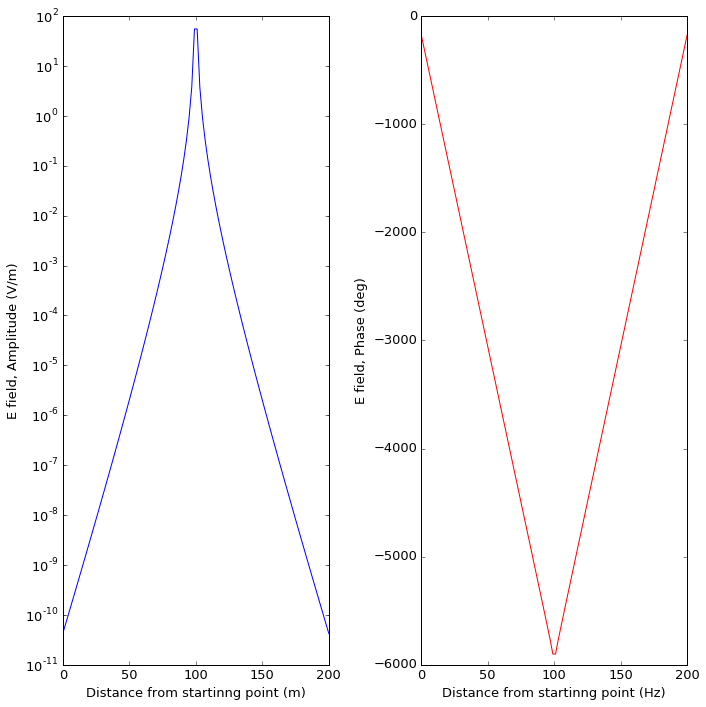

In [15]:
fig = plt.figure(figsize=(10,10))
ax0=plt.subplot(121)
ax1=plt.subplot(122)
start=np.r_[-100.,0.]
end=np.r_[100.,0.]
nbmp=100
ax0,ax1 = self.plot_1D_AP_section(start,end,nbmp,"x",ax0,ax1)
ax0.set_yscale("Log")
plt.tight_layout()

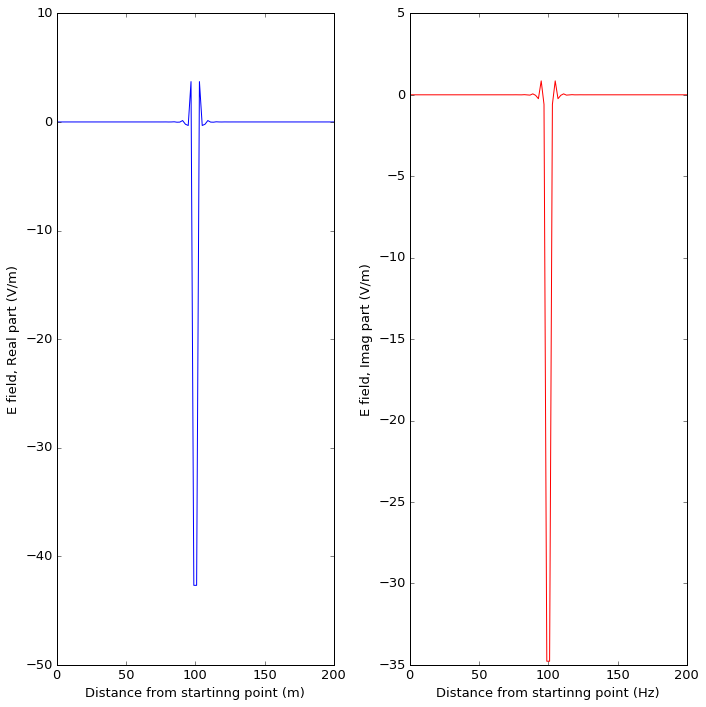

In [14]:
fig = plt.figure(figsize=(10,10))
ax0=plt.subplot(121)
ax1=plt.subplot(122)
start=np.r_[-100.,0.]
end=np.r_[100.,0.]
nbmp=100
ax0,ax1 = self.plot_1D_RI_section(start,end,nbmp,"x",ax0,ax1)

plt.tight_layout()

<function ipywidgets.widgets.interaction.<lambda>>

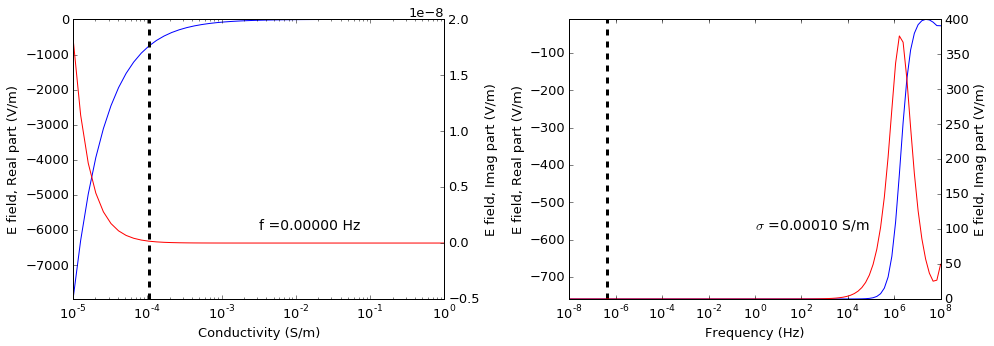

In [11]:
sigind = IntSlider(min=0, max =len(sigvec)-1, step=1,value=10)
freqind = IntSlider(min=0, max =len(fvec)-1, step=1,value=10)
obslocx = IntSlider(min=-100, max =100, step=1,value=0)
obslocy = IntSlider(min=-100, max =100, step=1,value=0)
obslocz = IntSlider(min=-100, max =100, step=1,value=1)
mode = ToggleButtons(options=['RI','AP'],value='RI')
interact(self.plot_1D_x,sigind=sigind,freqind=freqind,mode=mode,obslocx=obslocx,obslocy=obslocy,obslocz=obslocz)

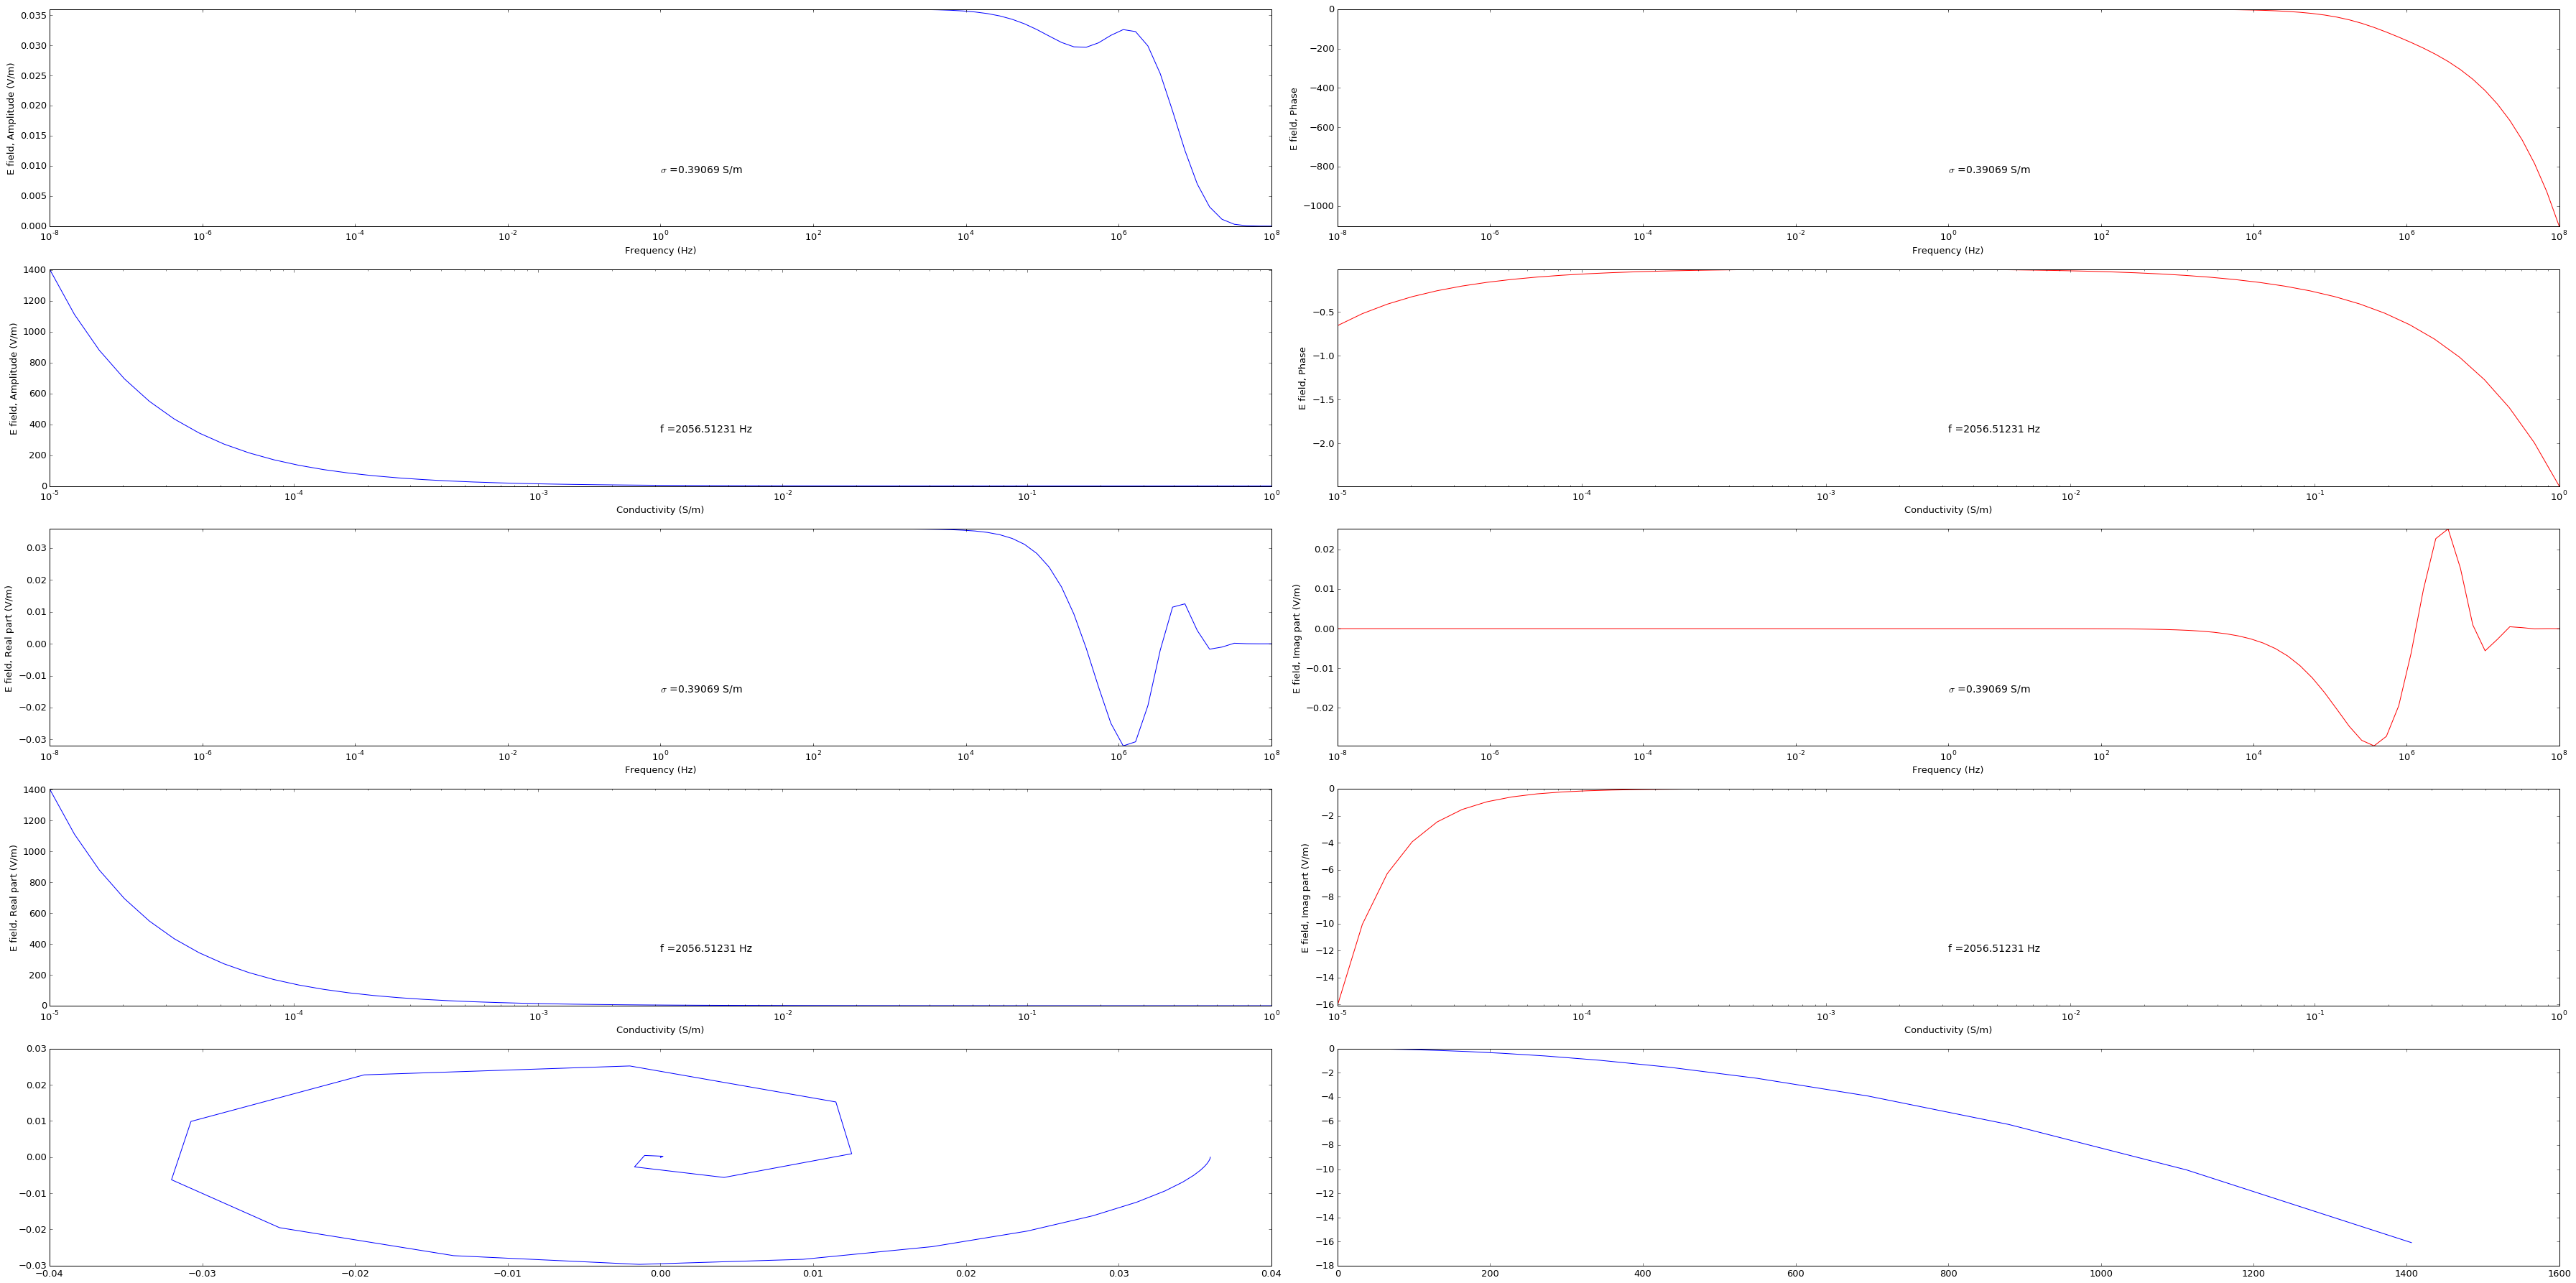

In [7]:
sigind=45
freqind=70

absloc=1.
coordloc=1.

figfig = plt.figure(figsize=(50,25))
ax0 = plt.subplot(521)
ax1 = plt.subplot(522)
ax2 = plt.subplot(523)
ax3 = plt.subplot(524)
ax4 = plt.subplot(525)
ax5 = plt.subplot(526)
ax6 = plt.subplot(527)
ax7 = plt.subplot(528)
ax8 = plt.subplot(529)
ax9 = plt.subplot(5,2,10)

ax0,ax1 = self.plot_1D_AP_f_x(absloc,coordloc,ax0,ax1,sigind)
ax2,ax3 = self.plot_1D_AP_sig_x(absloc,coordloc,ax2,ax3,freqind)
ax4,ax5 = self.plot_1D_RI_f_x(absloc,coordloc,ax4,ax5,sigind)
ax6,ax7 = self.plot_1D_RI_sig_x(absloc,coordloc,ax6,ax7,freqind)
ax8 = self.plot_1D_phasor_f_x(absloc,coordloc,ax8,sigind)
ax9 = self.plot_1D_phasor_sig_x(absloc,coordloc,ax9,freqind)

plt.tight_layout()

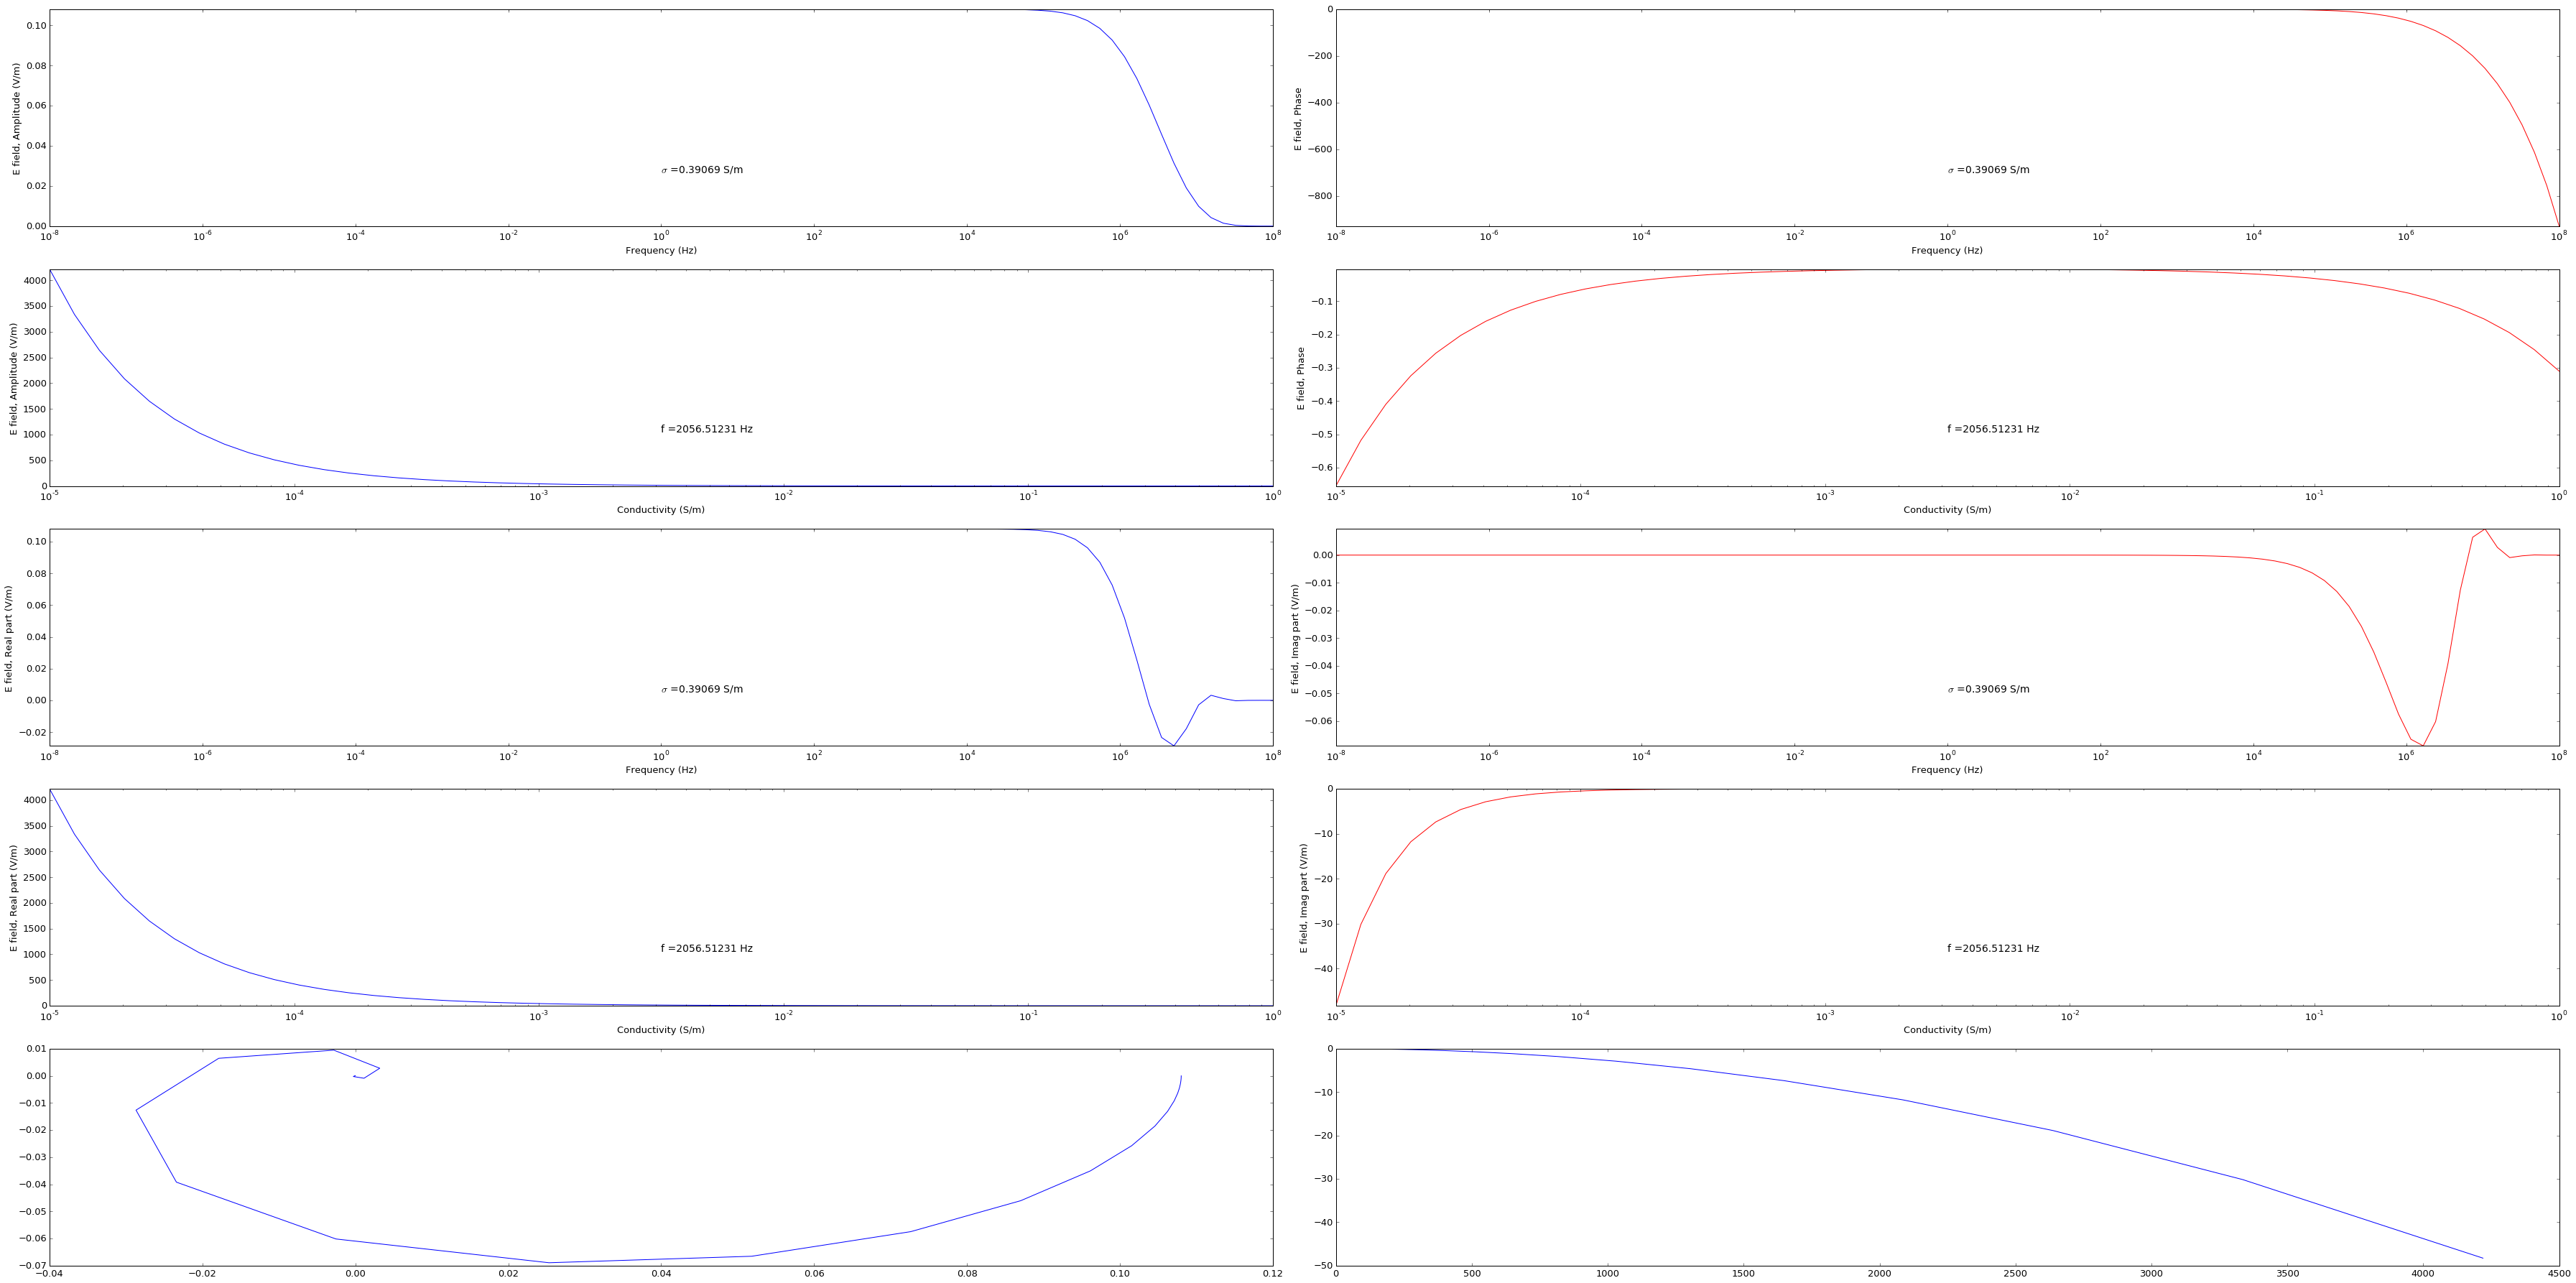

In [8]:
sigind=45
freqind=70

absloc=1.
coordloc=1.

figfig = plt.figure(figsize=(50,25))
ax0 = plt.subplot(521)
ax1 = plt.subplot(522)
ax2 = plt.subplot(523)
ax3 = plt.subplot(524)
ax4 = plt.subplot(525)
ax5 = plt.subplot(526)
ax6 = plt.subplot(527)
ax7 = plt.subplot(528)
ax8 = plt.subplot(529)
ax9 = plt.subplot(5,2,10)

ax0,ax1 = self.plot_1D_AP_f_y(absloc,coordloc,ax0,ax1,sigind)
ax2,ax3 = self.plot_1D_AP_sig_y(absloc,coordloc,ax2,ax3,freqind)
ax4,ax5 = self.plot_1D_RI_f_y(absloc,coordloc,ax4,ax5,sigind)
ax6,ax7 = self.plot_1D_RI_sig_y(absloc,coordloc,ax6,ax7,freqind)
ax8 = self.plot_1D_phasor_f_y(absloc,coordloc,ax8,sigind)
ax9 = self.plot_1D_phasor_sig_y(absloc,coordloc,ax9,freqind)

plt.tight_layout()

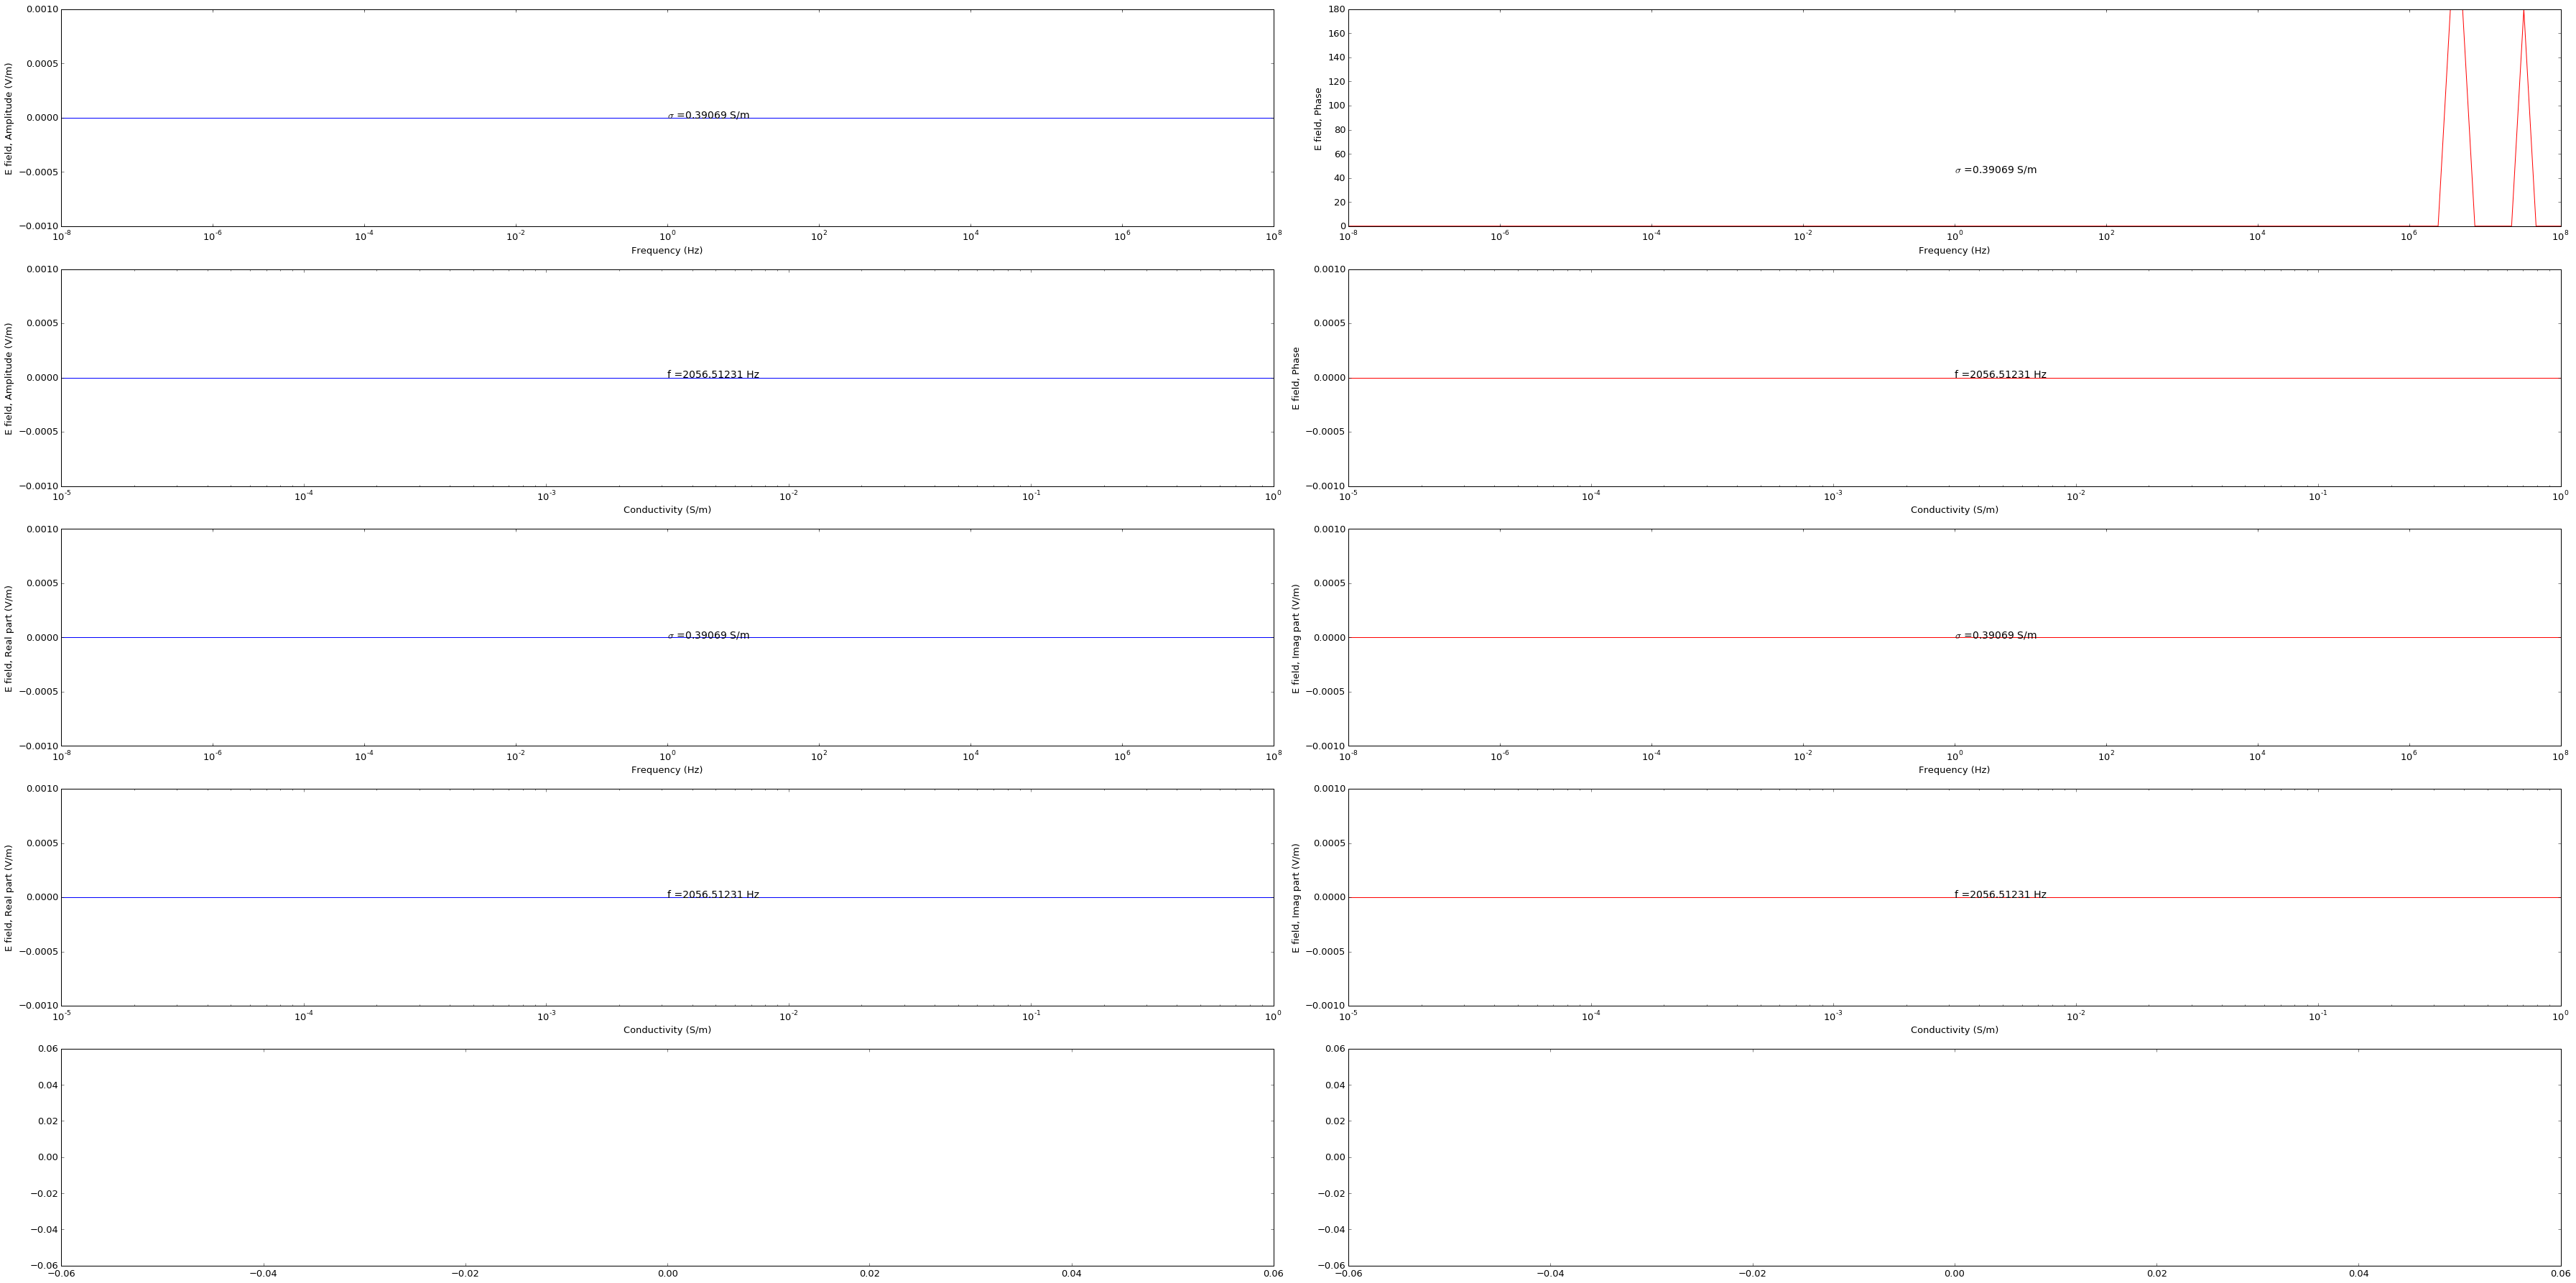

In [10]:
sigind=45
freqind=70

absloc=1.
coordloc=1.

fig = plt.figure(figsize=(50,25))
ax0 = plt.subplot(521)
ax1 = plt.subplot(522)
ax2 = plt.subplot(523)
ax3 = plt.subplot(524)
ax4 = plt.subplot(525)
ax5 = plt.subplot(526)
ax6 = plt.subplot(527)
ax7 = plt.subplot(528)
ax8 = plt.subplot(529)
ax9 = plt.subplot(5,2,10)

ax0,ax1 = self.plot_1D_AP_f_z(absloc,coordloc,ax0,ax1,sigind)
ax2,ax3 = self.plot_1D_AP_sig_z(absloc,coordloc,ax2,ax3,freqind)
ax4,ax5 = self.plot_1D_RI_f_z(absloc,coordloc,ax4,ax5,sigind)
ax6,ax7 = self.plot_1D_RI_sig_z(absloc,coordloc,ax6,ax7,freqind)
ax8 = self.plot_1D_phasor_f_z(absloc,coordloc,ax8,sigind)
ax9 = self.plot_1D_phasor_sig_z(absloc,coordloc,ax9,freqind)

plt.tight_layout()